In [1]:
import pandas as pd
import numpy as np

In [2]:
heart=pd.read_csv('heart.csv')

In [3]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart.dtypes


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(heart.drop(columns=['target']), heart['target'],
                 test_size=0.2, random_state=1984)

In [10]:
heart.info
y_train.info

AttributeError: 'Series' object has no attribute 'info'

In [11]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=2023)

In [12]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2023)

In [13]:
accuracy_decision_tree = tree.score(X_test,y_test)

In [14]:
print("the accuracy of decision tree is equal to: " + str(accuracy_decision_tree))

the accuracy of decision tree is equal to: 0.7377049180327869


In [15]:
tree.score(X_train,y_train)


1.0

In [16]:
from sklearn.neighbors import KNeighborsClassifier # KNeighborsClassifier is the KNN machine learning algorithem
KNN = KNeighborsClassifier(n_neighbors=1)

In [17]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
KNN.score(X_test,y_test)


0.6721311475409836

In [20]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier (random_state=2023, n_estimators=30)
forest.fit(X_train,y_train)
forest.score(X_test,y_test)


0.8852459016393442

In [21]:
forest.score(X_train,y_train)

1.0

In [22]:
forest.feature_importances_






array([0.08288346, 0.02345801, 0.13543879, 0.07036553, 0.07973825,
       0.01001127, 0.0172513 , 0.13360952, 0.05340094, 0.09921931,
       0.07170828, 0.10570899, 0.11720633])

In [23]:
import matplotlib.pyplot as plt

In [24]:
n_features=X_train.shape[1]
np.arange(n_features)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

Text(0, 0.5, 'feature names')

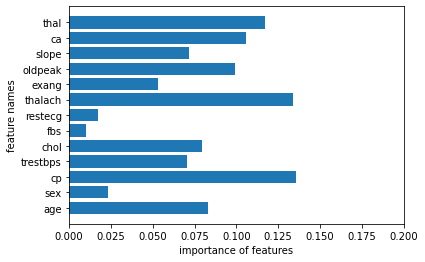

In [25]:
plt.barh(range(n_features),forest.feature_importances_)
plt.yticks(ticks=np.arange(n_features), labels=X_train.columns)
plt.xlim(right=0.2) 
plt.show
plt.xlabel("importance of features")
plt.ylabel("feature names")

Text(0, 0.5, 'feature names')

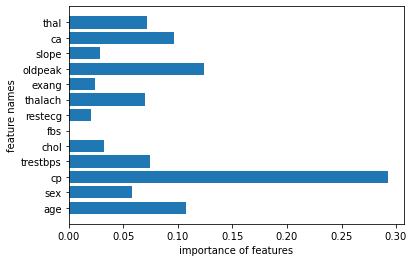

In [26]:
plt.barh(range(n_features),tree.feature_importances_)
plt.yticks(ticks=np.arange(n_features), labels=X_train.columns)
#plt.xlim(right=0.2) 
plt.show
plt.xlabel("importance of features")
plt.ylabel("feature names")

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
gbtree = GradientBoostingClassifier(learning_rate=0.1, 
                                    max_depth=1, random_state=1984)
gbtree.fit(X_train, y_train)
gbtree_score_test=gbtree.score(X_test,y_test)
gbtree_score_train=gbtree.score(X_train,y_train)

print("score of gntree in training data is " + str(gbtree_score_train))
print("score of gbtree in testing data is " + str(gbtree_score_test))

score of gntree in training data is 0.9090909090909091
score of gbtree in testing data is 0.8360655737704918


Text(0, 0.5, 'feature names')

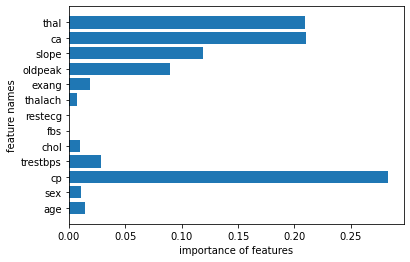

In [28]:
plt.barh(range(n_features),gbtree.feature_importances_)
plt.yticks(ticks=np.arange(n_features), labels=X_train.columns)
#plt.xlim(right=0.2) 
plt.show
plt.xlabel("importance of features")
plt.ylabel("feature names")

In [30]:
import xgboost as xgb

In [37]:
train = xgb.DMatrix(X_train, label=y_train)
test = xgb.DMatrix(X_test, label=y_test)
params = {
    'max_depth' : 3,
    'eta' : 0.1,
    'objective': 'binary:hinge'
}
epochs = 100 
XGB_model=xgb.train(params,train,epochs)
XGB_prediction=XGB_model.predict(test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,XGB_prediction)

0.8360655737704918

In [120]:
















































































































from sklearn.ensemble import GradientBoostingClassifier
gbtree = GradientBoostingClassifier(learning_rate=0.2, max_depth=2, random_state=1984)
gbtree.fit(X_train,y_train)
gbtree_score_test=gbtree.score(X_test, y_test)
gbtree_score_train=gbtree.score(X_train, y_train)
print ("score of gbtree in training data is " + str(gbtree_score_train))
print ("score of gbtree in testing data is " + str(gbtree_score_test))

score of gbtree in training data is 0.9917355371900827
score of gbtree in testing data is 0.7704918032786885


Text(0, 0.5, 'feature names')

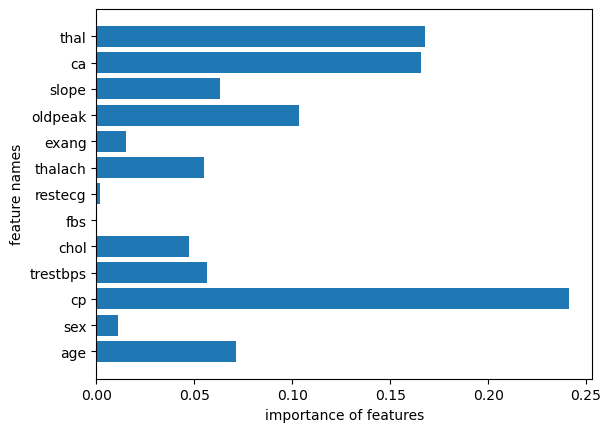

In [121]:
plt.barh(range(n_features),gbtree.feature_importances_)
plt.yticks(ticks=np.arange(n_features), labels=X_train.columns)
#plt.xlim(right=0.2) 
plt.show
plt.xlabel("importance of features")
plt.ylabel("feature names")

In [176]:
#XGBPOOST example:

#you first need to install XGBOOST on anacanda. 
#To do so, go to the prgorams and start ANACANDA PROMPT once the window is open type:
#pip install xgboost

import xgboost as xgb


In [177]:
#before you can train xgboost, you need to change data into a DMatrix
train = xgb.DMatrix(X_train, label=y_train)
test = xgb.DMatrix(X_test, label=y_test)

In [206]:
#now we have to define the hyperparameter values for XGBOOST
param = {
    'max_depth' : 2,
    'eta' : 0.2,
    'objective' : 'binary:hinge'
}
epochs = 1000

In [207]:
model = xgb.train(param, train, epochs)

In [208]:
tesing_predictions = model.predict(test)
print (tesing_predictions)

training_predictions = model.predict(train)


[0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1.]


In [209]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,tesing_predictions)

0.7868852459016393

In [210]:
accuracy_score(y_train, training_predictions)

1.0